# Języki symboliczne - rok akademicki 2021/2022

Przed rozpoczęciem pracy z notatnikiem zmień jego nazwę zgodnie z wzorem: `NrAlbumu_Nazwisko_Imie_PoprzedniaNazwa`

Przed wysłaniem notatnika upewnij się, że rozwiązałeś wszystkie zadania/ćwiczenia, w szczególności, że uzupełniłeś wszystkie pola `YOUR CODE HERE` oraz `YOUR ANSWER HERE`.

## Scheme: Rekurencja, iteracja, definicje wyższego poziomu.

### Pętla -> rekurencja

Wykorzystywane konstrukcje w języku Scheme (przypomnienie):
```scheme 
(begin ...)
```
- służy do wprowadzania bloków kodu. Wyrażenia będące argumentami begin są po kolei ewaluowane, cały blok zaś ewaluuje się do wartości ostatniego wyrażenia.

```scheme
(set! zmienna wartosc)
```
- zmienia wartość wcześniej zdefiniowanej zmiennej `zmienna` na wartość wyrażenia `wartosc`. Ta konstrukcja powinna być unikana, gdyż kłóci się z paradygmatem funkcyjnym przyjętym w Scheme.


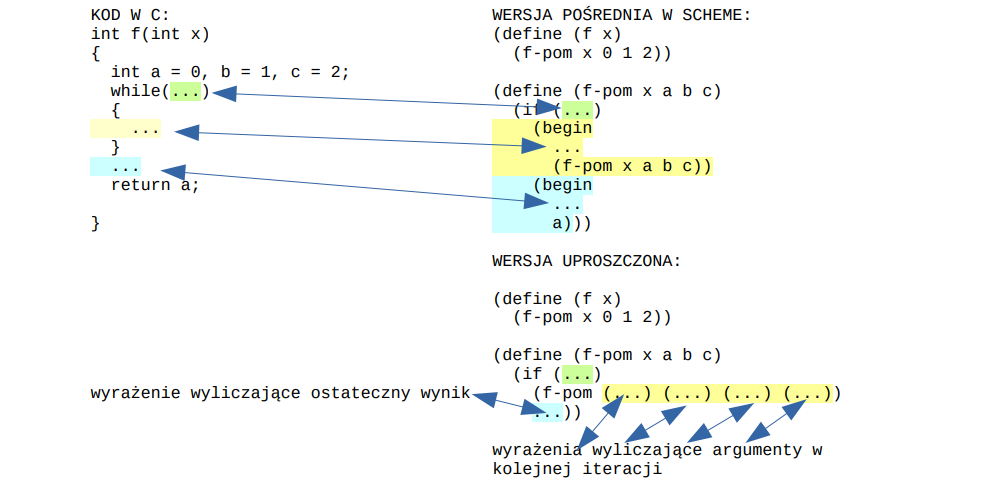

__UWAGA!__
Preferowana jest wersja uproszczona, gdyż nie wymaga zmiany wartości zmiennych `set!em`. W każdym przypadku należy dążyć do zapisania funkcji w postaci uproszczonej. Wersja pełna podana jest wyłącznie jako krok pośredni w celu lepszego zrozumienia 
procedury uzyskiwania wersji uproszczonej.

__Przykład__: Funkcja licząca sumę liczb od 1 do n.

```c
int suma(int n)
{
    int suma = 0, i = 1;    // -------- //
    while(i <= n)           //xxxxxxxxx//
    {
         suma += i;         //+++++++++//
         i++;               //+++++++++//
    }
    return suma;            //=========//
}
```

In [1]:
;WERSJA POŚREDNIA:
(define (suma n) 
  (suma-pom 0 1 n))           ;----------;

(define (suma-pom suma i n) 
  (if (<= i n)                ;xxxxxxxxxx;
      (begin 
       (set! suma (+ suma i)) ;++++++++++;
       (set! i (+ 1 i))       ;++++++++++;
       (suma-pom suma i n))   ;++++++++++;
      (begin 
       suma))                 ;==========;
  )

(suma 5)

15

In [2]:
;WERSJA UPROSZCZONA:
(define (suma n) 
  (suma-pom 0 1 n))                    ;----------;

(define (suma-pom suma i n) 
  (if (<= i n)                         ;xxxxxxxxxx;
      (suma-pom (+ suma i) (+ i 1) n)  ;++++++++++;
      suma))                           ;==========;

(suma 5)

15

### Rekurencja ogonowa
    
Jeśli __proces iteracyjny może się wykonywać w stałej pamięci i opisany jest za pomocą procedury rekurencyjnej__ (w Lispie jest to możliwe w odróżnieniu np. od Pascala, Ady czy C) to jeśli implementacja danego języka programowania ma tę cechę __to mówimy wówczas o rekursji ogonowej__ (ang. `tail recursion`).


```scheme
Proces rekurencyjny                                Proces iteracyjny

(define (suma n)                                   (define (suma n)
 (if (eq? n 1)                                       (suma-iter 0 1 n))   
 1                                                 (define (suma-iter suma i n)
 (+ n (suma (- n 1)))))                              (if (<= i n)                         
                                                         (suma-iter (+ suma i) (+ i 1) n)  
                                                         suma))     

(suma 5)                                           (suma 5)
(+ 5 (suma 4))                                     (suma-iter 0 1 5)
(+ 5 (+ 4 (suma 3)))                               (suma-iter 1 2 5)
(+ 5 (+ 4 (+ 3 (suma 2))))                         (suma-iter 3 3 5)
(+ 5 (+ 4 (+ 3 (+ 2 ( suma 1)))))                  (suma-iter 6 4 5)
(+ 5 (+ 4 (+ 3 (+ 2 1))))                          (suma-iter 10 5 5)
(+ 5 (+ 4 (+ 3 3)))                                (suma-iter 15 6 5)
(+ 5 (+ 4 6))                                      15
(+ 5 10)
15
```
- w odróżnieniu od pierwszego, „kształt” drugiego procesu się nie rozszerza ani nie zwęża. Jedyne co musimy śledzić w każdym kroku (dla każdego n) to: `suma`, `licznik` i `max-licznik`;

- proces iteracyjny to proces którego stan może być opisany przez ustaloną liczbę zmiennych stanu (ang. state variables), którego zmiany stanów możemy opisać ustaloną regułą mówiącą, jak zmieniają się wartości zmiennych stanu, oraz którego zakończenie (opcjonalnie) możemy opisać za pomocą warunku końcowego;

- warunek rekurencji ogonowej: ostatnia wykonywana operacja funkcji musi być albo wywołaniem samej siebie, albo zwróceniem wyniku;
- zastosowanie rekurencji ogonowej zapobiega przepełnieniu pamięci stosu;


In [3]:
; Proces rekurencyjny
(define (suma n)
 (if (eq? n 1)
 1
 (+ n (suma (- n 1)))))

(suma 5)

15

In [4]:
; Proces iteracyjny
(define (suma n) 
  (suma-iter 0 1 n))                   

(define (suma-iter suma i n) 
  (if (<= i n)                         
      (suma-iter (+ suma i) (+ i 1) n)  
      suma))                           

(suma 5)

15

__Przykład:__

Funkcja zwracająca liczbę elementów w liście.

In [5]:
;; Funkcja obliczająca liczbę elementów w liście - proces rekurencyjny
(define (dlugosc lista) 
  (if (null? lista) 
      0 
      (+ 1 (dlugosc (cdr lista)))))

(dlugosc '(a b c d e))

5

In [6]:
;; Funkcja obliczająca liczbę elementów w liście - proces iteracyjny, rekurencja ogonowa
(define (dlugosc lista licznik) 
  (if (null? lista) 
      licznik 
      (dlugosc (cdr lista) (+ 1 licznik))))

(dlugosc '(a b c d e) 0)

5

### Procedury wyższego rzędu

- Procedura wyższego rzędu jest to funkcja, która akceptuje funkcje jako argumenty i ma możliwość zwracania funkcji jako rezultat swojego działania. Jest to jedna z najważniejszych cech języków funkcyjnych.
- Procedury operujące na procedurach nazywane są procedurami wyższych rzędów (ang. higher-order procedures).

In [7]:
; Przekazywanie procedur jako jako argumentów do innych procedur
(define (f a) (+ a a))     ; definicja funkcji f

(define (Funkcja fun a b)  ; Funkcja jako pierwszy argument przyjmuje funkcję f 
  (+ b (fun a)))           ; b + f(a) = 3 + (2 + 2)

(Funkcja f 2 3)

7

In [8]:
; Procedura, która jako wynik zwraca procedurę
(define (utworz-sume n)
  (lambda (x) (+ x n)))

(print (utworz-sume 2)) ; (utworz-sume 2) zwraca procedurę
((utworz-sume 2) 5)

#<procedure>


7

Wartością wyrażenia `(utworz-sume 2`) jest procedura a nie liczba! Jest to nienazwana procedura dodająca 2 do jej argumentu.

Wkorzystując model podstawieniowy możemy ją zapisać jako:
```scheme
(lambda (x) (+ x 2))
```

In [9]:
; Procedura, która jako argumety przyjmuje procedury i wynik zwraca jako procedurę
(define (iloczyn x) (* x x))
(define (suma y) (+ y y))

(define (DwieFunkcje fun-A fun-B) 
  (lambda (x) (fun-A (fun-B x)))) ; zwraca procedurę

((DwieFunkcje suma iloczyn) 4)

32

__Uwaga!__
```scheme
Wyrażenie                               jest równoważe wyrażeniu
----------------------------------------------------------------
((lambda (<v1> ... <vn>)                (let ((<v1> <e1>) 
   <treść>)                                   (<v2> <e2>) 
 <e1>                                          ... 
 ...                                          (<vn> <en>)) 
 <en>)                                    <treść>)
```

```scheme
----------------------------------------------------------------
((lambda (name) exp) val)               (let ((name val)) exp)
----------------------------------------------------------------
```




In [10]:
((lambda (x) (+ x x)) (* 2 3))

12

In [11]:
(let ((x (* 2 3))) (+ x x))

12

#### Przykład

Napisz funkcję daną wzorem w dwóch wersjach z `lambda` i `let`:

$$
a=1+xy
$$
$$
b=1-y
$$
$$
f(x, y) = xa^2 + yb + ab
$$

Wyznacz wartość funkcji dla `x=1`,`y=2`.

In [12]:
(define (square x) (* x x))

(define (f x y) 
  ((lambda (a b) 
     (+ (* x (square a)) 
        (* y b) 
        (* a b))) 
   (+ 1 (* x y)) (- 1 y)))

(f 1 2)

4

In [13]:
(define (f x y) 
  (let ((a (+ 1 (* x y))) 
        (b (- 1 y))) 
    (+ (* x (square a)) 
       (* y b) 
       (* a b))))

(f 1 2)

4

#### Wyznaczanie sumy szeregu

Wyznacz wartość funkcji w danym punkcie x, korzystając z jej rozwinięcia w szereg Taylora.

$$f(x)=e^{x}=1+\frac{x}{1!}+\frac{x^{2}}{2!}+\frac {x^{3}}{3!}+\dots$$

Przepis na n-ty wyraz: 

$$a_{n}=\frac{x^{n}}{n!} \textrm{ dla  }n=0,1,\dots$$

Do wyznaczenia wartości funkcji w punkcie `x=2` użyj pierwszych 20 wyrazów szeregu.

In [14]:
(define (F i n x fun) 
  (if (> i n) 
      0 
      (+ (fun i x) (F (+ i 1) n x fun))))
  
(define (f i x) (/ (expt x i) (fact i)))

;; potęgowanie
(define (expt b n) 
  (if(= n 0)
     1 
     (* b (expt b (- n 1)))))

;; silnia
(define (fact n)
  (if (or (= n 1) (= n 0)) 
      1
      (* n (fact (- n 1)))))


(float (F 0 20 2 f))

7.389056098930605

## Zadanie 1

 Napisz funkcję liczącą __rekurencyjnie__ silnię podanej liczby naturalnej.
 
 https://mitpress.mit.edu/sites/default/files/sicp/full-text/book/book-Z-H-11.html#%_sec_1.2.1 

In [5]:
;;; BEGIN SOLUTION
(define (factorial n)                                  
 (if (= n 1)                                         
 1                                                 
 (* n (factorial (- n 1)))))                                                       
                                                          
(factorial 6)                                                            
;;; END SOLUTION

720

## Zadanie 2

Napisz funkcję liczącą __iteracyjnie__ (z zastosowaniem rekurencji ogonowej) silnię podanej liczby naturalnej.

In [6]:
;;; BEGIN SOLUTION
(define (factorial n)
  (fact-iter 1 1 n))
(define (fact-iter product counter max-count)
  (if (> counter max-count)
      product
      (fact-iter (* counter product)
                 (+ counter 1)
                 max-count)))
(factorial 6)
;;; END SOLUTION

720

## Zadanie 3

Napisz funkcję liczącą __rekurencyjnie__ podany wyraz ciągu Fibonacciego.

https://mitpress.mit.edu/sites/default/files/sicp/full-text/book/book-Z-H-11.html#%_sec_1.2.2

In [33]:
;;; BEGIN SOLUTION
(define fibonacci
    (lambda (n)
      (let fib ((i n))
        (cond ((= i 0) 0)
              ((= i 1) 1)
              (else (+ (fib( - i 1)) (fib ( - i 2))))))))

(fibonacci 6)
;;; END SOLUTION

8

## Zadanie 4

 Napisz funkcję liczącą __iteracyjnie__ (rekurencja ogonowa) podany wyraz ciągu Fibonacciego.

In [28]:
;;; BEGIN SOLUTION
(define (fibonacci n)
    (fib-iter 1 0 n))
(define (fib-iter a b count)
    (if (= count 0)
        b
        (fib-iter (+ a b) a (- count 1)) ) )

(fibonacci 6)
;;; END SOLUTION

8

## Zadanie 5

Napisz funkcję liczącą dowolną naturalną potęgę dowolnej liczby całkowitej w wersji rekurencyjnej oraz iteracyjnej.

https://mitpress.mit.edu/sites/default/files/sicp/full-text/book/book-Z-H-11.html#%_sec_1.2.4 

In [44]:
;;; BEGIN SOLUTION
(define (pow-i x n)
  (pow-iter 1 x 1 n))

(define (pow-iter bef x i n)
    (if (= n 0)
      (quote 1)
      (if (> n i)
      (pow-iter (* bef x) x (+ i 1) n)
      (* bef x))))

(define (pow-r x n)
  (cond ((= n 0) 1)
        ((= n 1) x)
        (else (* x  (pow-r x (- n 1))))))


(display (pow-i -1 0))
(pow-r 3 3)
;;; END SOLUTION

1

27

## Zadanie 6

Napisz funkcję `F` przyjmującą jako argument dwie liczby `a` i `b` oraz funkcję `f`. Funkcja `F`powinna liczyć sumę:

$$
F(a, b, f) = \sum_{i=a}^{b} f(i)
$$

Zaprezentuj działanie funkcji `F`. Przykładowo, dla pewnej funkcji `f` zwracającej liczbę 1, wywołanie `(F 2 5 f)` powinno wywołać `f` 4 razy (z argumentem 2, 3, 4 i 5) i zwrócić liczbę 4 (suma czterech jedynek).

https://mitpress.mit.edu/sites/default/files/sicp/full-text/book/book-Z-H-12.html#%_sec_1.3.1


In [54]:
;;; BEGIN SOLUTION
(define (F x y fun)
  (F-iter 0 x y fun))

(define (F-iter suma i x fun)
  (if (> x i)
      (F-iter (+ suma (fun i)) (+ i 1) x fun)
      (+ suma (fun i))
  )
)
(define (f a) (quote 1))  

(F 2 5 f)
;;; END SOLUTION

4

## Zadanie 7

Wykorzystaj `lambda` do zaprezentowania działania funkcji `F` z zadania 6.

https://mitpress.mit.edu/sites/default/files/sicp/full-text/book/book-Z-H-12.html#%_sec_1.3.2

In [56]:
;;; BEGIN SOLUTION
(F 2 5 (lambda (x) (quote 1)))
;;; END SOLUTION

4

## Zadanie 8

Zmodyfikuj funkcję `F` z poprzedniego zadania dodając do niej kolejny argument – liczbę `x`. Wykorzystaj `F` do przybliżenia wartości funkcji `sinus` wykorzystując rozwinięcie w szereg Taylora.
Wykorzystaj `let` do stworzenia zmiennych lokalnych (`licznik`, `mianownik` w definicji funkcji `f`). 
Czym różni się `let` od `let*`?.

$$
F(a, b, x, f) = \sum_{i=a}^{b} f(i, x)
$$

$$
sin(x) = \sum_{i=0}^{\infty} \frac{(-1)^i}{(2i+1)!}x^{2i+1} \approx F(0, 20, x, f)
$$

$$
f(i, x) = \frac{(-1)^i}{(2i+1)!}x^{2i+1}
$$


In [38]:
;;; BEGIN SOLUTION
(define (round-off z n)
  (let ((power (expt 10 n)))
    (/ (round (* power z)) power)))

(define (F a b x fun)
  (F-iter 0 a b x fun))

(define (F-iter suma i b x fun)
  (if (> b i)
      (F-iter (+ suma (fun i x)) (+ i 1) b x fun)
      (+ suma (fun i x))
  )
)

(define (f i x)
  (* 
   (let ((licznik (pow-r -1 i)) (mianownik (factorial (+ 1 (* 2 i)))))
    (/ licznik mianownik ) ) 
    (pow-r x (+ 1 (* 2 i)))) )

(round-off (F 0 20 2 f) 3)
;(round-off (f2 1 2) 3)

;;; END SOLUTION

0.909

## Scheme: Pary, Listy,  Struktury (DrRacket), Struktury hierarchiczne, Zbiory, Wektory

## Pary 
### Listowe struktury danych

- Para – struktura złożona
- Tworzona za pomocą procedury pierwotnej `cons` (konstruktor).
- Procedura ta ma dwa argumenty, a jej wynikiem jest złożony obiekt danych zawierający, jako swoje części, te dwa argumenty.
- Mając daną parę, możemy z niej wydobyć jej części za pomocą procedur pierwotnych `car` i `cdr` (selektory)
- Predykat `pair?` 
- Można tworzyć pary których elementami są również pary
- Obiekty danych zbudowane z par nazywamy listowymi strukturami danych (ang. `list-structured data`)

In [1]:
(define x (cons 1 2))
(print (car x) (cdr x))

1
2


In [2]:
; Liczbę wymierną zapisujemy jako parę liczb całkowitych – licznik i mianownik
(define (make-rat n d) (cons n d)) ; konstruktor
(define (numer x) (car x))         ; selektor
(define (denom x) (cdr x))         ; selektor

(define LW (make-rat 1 2))
(print (numer LW) (denom LW))

1
2


- pary są uniwersalnymi elementami składowymi, z których możemy budować wszystkie rodzaje struktur danych.
- możliwość tworzenia par, których elementami są pary, stanowi istotę struktury listowej.
- możliwość taką nazywamy własnością domknięcia `cons`.
- operacja służąca do łączenia obiektów danych ma własność domknięcia, jeśli wyniki łączenia za pomocą tej operacji mogą same być łączone za pomocą tej operacji.
- własność domknięcia pozwala na tworzenie __struktur hierarchicznych__ - struktur złożonych z części, które same są złożone z części itd.

__Ciąg konstruujemy za pomocą zagnieżdżonych operacji `cons` i nazywamy `listą`.__

In [3]:
; ciąg (ang. sequence) - uporządkowana kolekcja obiektów danych.
(cons 1 (cons 2 (cons 3 (cons 4 ()))))

(1 2 3 4)

## Listy

- podstawowy typ danych
- sekwencja obiektów (par) otoczona nawiasami `( ... )`
- elementami list są pary
- pierwszy element	pary jest wskaźnikiem do atomu lub	listy	
- drugi	element	pary jest wskaźnikiem do innego	elementu lub wskaźnikiem do	listy pustej `()`
- elementy list	są łączone za pomocą drugiego elementu pary	

__Notacja klasyczna__

```scheme
    (a b c d)
```

__Notacja "kropkowa"__

```scheme
(a . (b . (c . (d . ()))))
```
__Lista właściwa__
- `cdr` z ostatniej pary w liście jest listą pustą
- lista pusta jest listą właściwą
- każda para, dla której ogon jest listą właściwą to również jest to lista właściwa

__Lista niewłaściwa__
- drukowana w notacji kropkowane-pary, np. `(cons 'a '(b . c))` tworzy `(a b . c)`

### Procedury z dowolną liczbą argumentów

Tworzymy poprzez zastosowanie notacji `kropki i ogona` w `define`:
- Kropka na liście parametrów, przed ostatnim parametrem.
- Początkowe parametry przyjmują jak zwykle wartości początkowych argumentów, a wartością ostatniego jest lista wartości pozostałych argumentów

```scheme
(define (f x y . z) <treść>)
```
Jeśli wywołamy:
```scheme
(f 1 2 3 4 5 6)
```
To w treści procedury f:

    x – będzie równe 1
    y – będzie równe 2
    z – będzie listą (3 4 5 6)


In [4]:
(define (f x y . z) (print x y z))
(f 1 2 3 4 5 6)

1
2
(3 4 5 6)


### Odwzorowywanie list
Zastosowanie danego przekształcenia do wszystkich elementów listy i utworzenie listy wyników

### Mapowanie - procedura `map`

- argumentami `map` są procedura jednoargumentowa i lista
- wynikiem jest lista utworzona z wyników zastosowania danej procedury do kolejnych elementów danej listy

In [5]:
(map (lambda (n) (+ n 2)) '(3 4 5))

(5 6 7)

In [6]:
(define (kwadrat x) (* x x)) (define lista (list 1 2 3 4))
(map kwadrat lista)


(1 4 9 16)

### Połączenie

- wykorzystanie funkcji do połączenia elementów dwóch lub więcej list;
- można do tego celu wykorzystać `map`- argumentami są procedura n-argumentowa oraz n-list. `Map` stosuje tę procedurę do wszystkich pierwszych elementów list, wszystkich drugich elementów list itd., dając w rezultacie listę tak uzyskanych wyników;

In [7]:
(map + '(1 2 3) '(4 5 6) '(7 8 9))

(12 15 18)

In [8]:
(define (kwadrat3 x y z) (+ (* x x) (* y y) (* z z)))

(map kwadrat3 '(1 2 3) '(4 5 6) '(7 8 9))

(66 93 126)

### Redukcja

- zamiana listy na wartość

In [9]:
(define (iloczyn lista) 
  (if (null? lista) 
      1 
      (* (car lista) (iloczyn (cdr lista)))))

(iloczyn '(1 2 3 4 5))

120

In [10]:
;wybieranie z listy elementów spełniających określony warunek
(define (wybierz lista predykat) 
  (if (null? lista)  
      (list)  
      (let ((wynik (wybierz (cdr lista) predykat))) 
        (if (predykat (car lista)) 
            (cons (car lista) wynik) 
            wynik )))) 

(wybierz '(1 2 3 4 5) even?)

(2 4)

__Wybrane procedury Scheme-a do manipulacji listami:__  

- `append` sklejanie list (konkatenacja) w jedną. 
- `list-ref` zwraca element znajdujący się na podanej pozycji w liście
- `length`  zwraca liczbę elementów na najwyższym poziomie listy
- `reverse` zwraca odwróconą listę
- `for-each` stosuje podaną procedurę do każdej pozycji na liście (podobnie jak `map` ale nie zwraca listy)
- `eval` funkcja obliczania	wszystkiego (interpreter LISPa - traktuje listę jako wyrażenie Scheme)

In [12]:
(append '(1 2 3) '(4 5) '(6 7))

(1 2 3 4 5 6 7)

In [13]:
(list-ref '(1 2 3) 2)

3

In [14]:
(length '(1 2 3 4 (5 6)))

5

In [21]:
(reverse '(1 2 3 4 5))

(5 4 3 2 1)

In [22]:
(reverse '(1 2 3 4 (5 6)))

((5 6) 4 3 2 1)

In [16]:
(for-each + '(1 2 3) '(4 5 6) '(7 8 9)) ; procedura nic nie zwraca

In [17]:
(for-each (lambda (n) (print (* 2 n))) '(3 4 5))

6
8
10


In [11]:
(eval '(+ 1 1))

2

## Zadanie 9

Napisz funkcje pozwalające tworzyć i obsługiwać ułamki zwykłe (para `(licznik . mianownik)`):
- utworzenie ułamka (konstruktor),
- pobranie licznika ułamka (selektor),
- pobranie mianownika (selektor),
- dodawanie ułamków zwykłych,
- odejmowanie ułamków zwykłych,
- mnożenie ułamków zwykłych,
- dzielenie ułamków zwykłych.

https://mitpress.mit.edu/sites/default/files/sicp/full-text/book/book-Z-H-14.html#%_sec_2.1 

In [27]:
;;; BEGIN SOLUTION
(define (make-rat n d) (cons n d))
(define (numer x) (car x))
(define (denom x) (cdr x))


(define (add-rat x y)
  (make-rat (+ (* (numer x) (denom y))
               (* (numer y) (denom x)))
            (* (denom x) (denom y))))

(define (sub-rat x y)
  (make-rat (- (* (numer x) (denom y))
               (* (numer y) (denom x)))
            (* (denom x) (denom y))))

(define (mul-rat x y)
  (make-rat (* (numer x) (numer y))
            (* (denom x) (denom y))))

(define (div-rat x y)
  (make-rat (* (numer x) (denom y))
            (* (denom x) (numer y))))

(define first (make-rat 3 3))
(define second (make-rat 5 3))

(print (add-rat first second))

(define x (make-rat 1 2))
(define y (make-rat 3 4))
(print (add-rat x y))
;;; END SOLUTION

(24 . 9)
(10 . 8)


## Zadanie 10

Dodaj funkcję wypisującą ułamek zwykły w postaci `[licznik/mianownik]`.


In [30]:
;;; BEGIN SOLUTION
(define (print-rat x)
    (newline)
    (display "[")
    (display (numer x))
    (display "/")
    (display (denom x))
    (display "]"))

(define x (make-rat 1 2))
(print-rat x)
;;; END SOLUTION


[1/2]

## Zadanie 11

Utwórz strukturę danych opisującą ułamek zwykły, którego licznik i mianownik są liczbami zespolonymi, reprezentowaną przez parę złożoną z dwóch par: 
`((część rzeczywista licznika, część urojona licznika) oraz (część rzeczywista mianownika, część urojona mianownika))`.

Napisz funkcje do obsługi takiej struktury danych:
- utworzenie ułamka,
- pobranie części rzeczywistej licznika,
- pobranie części urojonej licznika,
- pobranie części rzeczywistej mianownika,
- pobranie części urojonej mianownika.

In [1]:
;;; BEGIN SOLUTION
(define (make-compl l_r l_u m_r m_u) 
  (cons (cons l_r l_u) (cons m_r m_u)))
(define (licznik_r z) 
  (car (car z)))
(define (licznik_u z) 
  (cdr (car z)))
(define (mianownik_r z) 
  (car (cdr z)))
(define (mianownik_u z) 
  (cdr (cdr z)))

(define example_complex (make-compl 2 1 3 4))

(print (licznik_r example_complex))
(print (licznik_u example_complex))
(print (mianownik_r example_complex))
(print (mianownik_u example_complex))
;;; END SOLUTION

2
1
3
4


## Zadanie 12

 Napisz __własną__ funkcję zwracającą element listy o podanym indeksie. Lista i indeks elementu przesyłane są do funkcji jako argumenty.
 
 https://mitpress.mit.edu/sites/default/files/sicp/full-text/book/book-Z-H-15.html#%_sec_2.2.1 

In [3]:
;;; BEGIN SOLUTION
(define (index_of list_el i )
    (cond ((null? list_el) list_el) 
            ((not(list? list_el)) () )
            ((> (+ i 1) (length list_el)) () )
            ((< i 0) ())
            (else (find_el 0 i list_el))))

(define (find_el count index list_el)
       (if (> index count)
           (find_el (+ count 1) index (cdr list_el))
           (car list_el)))

(define list12 (list 4 7 44 -4))
(print list12)
(index_of list12 3)
;;; END SOLUTION

(4 7 44 -4)


-4

## Zadanie 13

Napisz __własną__ funkcję zwracającą długość listy.

In [7]:
;;; BEGIN SOLUTION
(define length-self
  (lambda (ls)
  (if (null? ls) 0 (+ (length-self (cdr ls)) 1))))

(define list13 (list 4 7 44 -4 5 6))
(print list13)

(length-self list13)
;;; END SOLUTION

(4 7 44 -4 5 6)


6

## Zadanie 14

Napisz funkcję zwracającą pierwszy parzysty element listy.

In [14]:
;;; BEGIN SOLUTION
(define (even-self list_el)
    (cond ((null? list_el) list_el) 
            ((not(list? list_el)) () )
            (else (find_even_el list_el))))

(define (find_even_el lista_el)
       (if (null? lista_el)
           ()
           (+  0 (if (even? (car lista_el))
                (car lista_el)
                (find_even_el (cdr lista_el))))
           ))

(define list14 (list 3 6 43 -4))
(print list14)
(even-self list14)
;;; END SOLUTION

(3 6 43 -4)


6

## Zadanie 15

Napisz funkcję wykonującą funkcję przesłaną jako argument na wszystkich elementach listy. Zaprezentuj jej działanie przy pomocy `lambdy`.

https://mitpress.mit.edu/sites/default/files/sicp/full-text/book/book-Z-H-15.html#%_sec_Temp_165


In [1]:
;;; BEGIN SOLUTION
(define (f x) (* x x))

(define list_15 (list 15 14 13 12 11 10 9 8 7 6 5 4 3 2 1 0))

(define (zad15 f arg) (map (lambda (i) (f i)) arg))


(zad15 f list_15)
;;; END SOLUTION

(225 196 169 144 121 100 81 64 49 36 25 16 9 4 1 0)

## Zadanie 16

Napisz __własną__ funkcję łączącą dwie listy.

In [1]:
;;; BEGIN SOLUTION
(define (zad16 listA listB)
  (if 
        (null? listA) 
        listB
        (cons (car listA) (zad16 (cdr listA) listB))))

(define listaP (list 9 8 7 6 5))
(define listaD (list 4 3 2 1 0))

(zad16 listaP listaD)
;;; END SOLUTION

(9 8 7 6 5 4 3 2 1 0)

## Zadanie 17

Napisz funkcję zwracającą listę, zawierającą wszystkie parzyste elementy zadanej listy.


https://mitpress.mit.edu/sites/default/files/sicp/full-text/book/book-Z-H-15.html#%_sec_Temp_159

In [1]:
;;; BEGIN SOLUTION
(define (select-even mix_list) 
  (if (null? mix_list)  
      ()  
      (let ((result (select-even (cdr mix_list)))) 
        (if (even? (car mix_list)) 
            (cons (car mix_list) result) 
            result )))) 

(select-even (list -6 -5 -4 -3 -2))
;;; END SOLUTION

(-6 -4 -2)

## Zadanie 18

Napisz funkcję `sumuj` sumującą wszystkie elementy przesłanej listy.

In [2]:
;;; BEGIN SOLUTION
(define (sumuj list_A)
  (if (null? list_A)
      0 
      (+ (car list_A) (sumuj (cdr list_A)))))

(sumuj (list 100 100 -200 23))
;;; END SOLUTION

23

## Zadanie 19

Napisz funkcję szukającą podanego elementu w przesłanej liście, zwracającą `prawdę` jeśli element znaleziono i `fałsz` w przeciwnym razie.

In [27]:
;;; BEGIN SOLUTION
(define (czy-zawiera listA x)
    (cond [(null? listA) #f]
        [(equal? (car listA) x) #t]
        [else (czy-zawiera (cdr listA) x)]))

(czy-zawiera (list 3 4 -7 1 30) 3)
;;; END SOLUTION

#t

## Zadanie 20

Napisz funkcję find zwracającą listę elementów spełniających warunek, zadany przy pomocy `lambdy` przesłanej do funkcji.

Przykład.

```scheme
(find (list 1 2 3 4 5 6) (lambda (x) (= (modulo x 2) 0)))

(2 4 6)
```

In [ ]:
;;; BEGIN SOLUTION

;;; END SOLUTION

## Struktury (DrRacket)

- Struktury w `Scheme` to złożony typ danych, składający się z wielu elementów, które mogą być typu prostego lub typu złożonego. 
- Do zdefiniowania struktury służy słowo kluczowe `define-struct`

```lisp
(define-struct nazwa_struktury 
 (składowa_struktury1 składowa_struktury2 ... składowa_strukturyN))
```

Kiedy `Scheme` przetwarza powyższą deklarację, __tworzy dodatkowe operacje__ pozwalające na:
- tworzenie struktury (__konstruktor__), 
- wybranie jednego z jej elementów (__selektor__) 
- rozróżnianie jej od wartości innych typów (__predykat__). 

Funkcje te przyjmują, odpowiednio, następującą postać: 

```lisp
(make-nazwa_struktury składowe)                       ;konstruktor
(nazwa_struktury-składowa_struktury nazwa_zmiennej)   ;selektor
(nazwa_struktury? nazwa_zmiennej)                     ;predykat
```
__Uwaga: `define-struct` nie jest dostępne w jądrze `Calysto`, zamiast tego mamy `define-datatype`.__


__Przykład 1__ (skopiuj do środowiska DrRacket):

```lisp
(define-struct punkt (x y)) 
; funkcje wygenerowane przez Scheme dla struktury punkt
(define P1 (make-punkt 5 8))   ; konstruktor make-point
(punkt-x P1)                   ; selektor punkt-x
(punkt-y P1)                   ; selektor punkt-y
(punkt? P1)                    ; predykat punkt?

```
__Przykład 2__ (skopiuj do środowiska DrRacket):

```lisp
(define-struct punkt (x y)) 
(define (kwadrat x) (* x x)) 
(define (odleglosc-pomiedzy-dwoma-punktami p1 p2)
  (cond ((and (punkt? p1) (punkt? p2))
         (sqrt (+ (kwadrat (- (punkt-x p1) (punkt-x p2)))
                  (kwadrat (- (punkt-y p1) (punkt-y p2))))))
        ((and (number? p1) (number? p2))
         (abs (- p1 p2)))
        (else "Błędne parametry funkcji")))

 (define P1 (make-punkt 4 4))
 (define P2 (make-punkt 5 5))
 (odleglosc-pomiedzy-dwoma-punktami P1 P2)
 (odleglosc-pomiedzy-dwoma-punktami 3 4)
```

## Definiowanie nowych typów danych

Do definiowania własnych typów danych (np. struktur) służy słowo kluczowe `define-datatype`

```lisp
(define-datatype TYP TYP? SKŁADNIKI)
```
Kiedy `Scheme` przetwarza powyższą deklarację, __tworzy operacje__ pozwalające na:
- tworzenie nowego typu danych (__konstruktor__), 
- rozróżnianie danego typu od wartości innych typów (__predykat TYP?__),
- można zdefiniować kilka konstruktorów np. dla struktur hierachicznych,
- `define-datatype` __nie tworzy selektorów__, należy je zdefiniować, używając polecenia `cases`, które daje dostęp do składowych obiektu utworzonych za pomocą `define-datatype`.

```lisp
(cases type object 
       (variant1 (data fields) exp1) 
       (variant2 (data fields) exp2) 
       ... )
```
__Przykład 1:__

In [ ]:
(define-datatype punkt punkt?                          ; predykat punkt?
                 (make-point (x number?) (y number?))) ; konstruktor 

(define (punkt-x point)          ;selektor punkt-x
  (cases punkt point
         (make-point (x y) x)))

(define (punkt-y point)          ;selektor punkt-y
  (cases punkt point
         (make-point (x y) y)))

In [ ]:
(define P1 (make-point 11 15))

(print P1 (punkt-x P1) (punkt-y P1) )

In [ ]:
; patrz również przykład struktury dla środowiska DrRacket.
(define (kwadrat x) (* x x)) 
(define (odleglosc-pomiedzy-dwoma-punktami p1 p2)
  (cond ((and (punkt? p1) (punkt? p2))
         (sqrt (+ (kwadrat (- (punkt-x p1) (punkt-x p2)))
                  (kwadrat (- (punkt-y p1) (punkt-y p2))))))
        ((and (number? p1) (number? p2))
         (abs (- p1 p2)))
        (else "Błędne parametry funkcji")))

 (define P1 (make-point 4 4))
 (define P2 (make-point 5 5))
 (print (odleglosc-pomiedzy-dwoma-punktami P1 P2)  (odleglosc-pomiedzy-dwoma-punktami 3 4))

W obrębie `define-datatype` można definiować __kilka__ konstruktorów

In [ ]:
(define-datatype punkt punkt?                                        ; predykat punkt?
                 (make-point (x number?) (y number?))                ; konstruktor 1
                 (make-point-3 (x number?) (y number?) (z number?))) ; konstruktor 2

(define (punkt-x point)          ;selektor punkt-x
  (cases punkt point
         (make-point (x y) x)
         (make-point-3 (x y z) x)))

(define (punkt-y point)          ;selektor punkt-y
  (cases punkt point
         (make-point (x y) y)
         (make-point-3 (x y z) y)))

(define (punkt-z point)          ;selektor punkt-z
  (cases punkt point
         (make-point-3 (x y z) z)))

In [ ]:
(define P2 (make-point-3 11 15 22))

(print P2 (punkt-x P2) (punkt-y P2) (punkt-z P2))

(punkt? P2)

__Przykład 2:__

Struktura zawierająca informację o prowadzonych zajęciach/kursie:

In [ ]:
(define-datatype course course?                                         ; typ predykat
       (regular (professor string?) (subject string?) (catnum number?)) ; konstruktor 1
       (seminar (leader string?) (subject string?)))                    ; konstruktor 2

(define (course->subject c)                                             ; selektor
        (cases course c
          (regular (professor subject catnum) subject)
          (seminar (leader subject) subject)))

(define CP1 (regular "Kowalski Stanisław" "Języki symboliczne" 15))
(define CL1 (seminar "Nowak Piotr" "Laboratorium nr 6"))

(print (course->subject CP1) (course->subject CL1))

__Przykład 3:__

Struktury hierarchiczne - drzewo binarne:

In [ ]:
(define-datatype binaryTree binaryTree? 
                 (null-node)                                 ; konstruktor 1 - brak węzła
                 (leaf-node (datum number?))                 ; konstruktor 2 - liść
                 (interior-node (key symbol?)                ; konstruktor 3 - węzeł wewnętrzny
                                (left-child binaryTree?)        ; lewy liść
                                (right-child binaryTree?)))     ; prawy liść

(define (binaryTree->node node)                              ; selektor
  (cases binaryTree node
         (leaf-node (v) v)
         (interior-node (sym lnode rnode) (print sym lnode rnode))))

In [ ]:
(define T1 (leaf-node 18))
(define T2 (leaf-node 13))
(define T3 (interior-node 'node1 T1 T2))
(define T4 (interior-node 'top T3 (null-node)))

(binaryTree->node T3)

In [ ]:
; operacje na drzewie binarnym - suma 
(define (sum tree) 
              (cases binaryTree tree 
                     (null-node () 0) 
                     (leaf-node (v) v) 
                     (interior-node (sym left right) 
                                    (+ (sum left) (sum right)))))

(sum T4)

## Zbiory

Zbiór to kolekcja różnych (niepowtarzających się) obiektów.

Wybrane operacje wykonywane na zbiorach:
- union-set
- difference-set
- intersection-set
- element-of-set?
- adjoin-set

Wybrane procedury dla zbiorów/list:
- Tworzenie zbiorów:

```scheme
(make-set LIST) ;zwraca listę/zbiór/ unikalnych elementów z LIST
```
- Zwraca listę w której wskazany element `ITEM` znajduje się na jej początku:

```scheme
(member ITEM LIST)
```

In [ ]:
(make-set '(1 2 3 1 2 3))

In [ ]:
(member 3 '(1 2 3 4 5))

### Zbiory jako listy nieuporządkowane

- zbiór jest reprezentowany jako lista jego elementów, na której żaden element nie występuje więcej niż raz. 
- Zbiór pusty jest reprezentowany przez pustą listę.
- użycie `equal?` zamiast `eq?` pozwala na porównywanie elementów zbiorów które nie muszą być tylko symbolami

In [ ]:
(define (element-of-set? x set) 
  (cond ((null? set) #f) 
        ((equal? x (car set)) #t)
        (else (element-of-set? x (cdr set)))))

In [ ]:
; dodanie elementu do zbioru
; jeśli element jest w zbiorze wynikiem jest ten sam zbiór, w przeciwnym razie cons dodaje obiekt do zbioru
(define (adjoin-set x set) 
  (if (element-of-set? x set) 
      set 
      (cons x set)))

In [ ]:
;różnica zbiorów
(define (difference-set set1 set2)
  (cond ((or (null? set1) (null? set2)) '() )
        ((element-of-set? (car set1) set2)  (difference-set (cdr set1) set2)) ; jeżeli znajduje się w drugim zbiorze weź kolejny
        (else (cons (car set1) (difference-set (cdr set1) set2)))))           ; w przeciwnym wypadku dodaj do zb. różnic

(define zb1 '(a b c d e)) (define zb2 '(c d e f g))
(print (difference-set zb1 zb2) (difference-set zb2 zb1))

In [ ]:
;część wspólna zbiorów
(define (intersection-set set1 set2) 
  (cond ((or (null? set1) (null? set2)) '())  
        ((element-of-set? (car set1) set2)                 ; jeżeli znajduje się w drugim zbiorze
         (cons (car set1)                                  ; dodaj do zbioru wspólnego
               (intersection-set (cdr set1) set2)))        
        (else (intersection-set (cdr set1) set2)))
  )

(define zb1 '(a b c d e)) (define zb2 '(c d e f g))
(intersection-set zb1 zb2)

In [ ]:
;suma zbiorów
(define (union-set set1 set2)
  (cond ((null? set2) set1)
        ((member (car set2) set1)
         (union-set set1 (cdr set2)))
        (else (union-set (cons (car set2) set1) (cdr set2)))))

(define zb1 '(a b c d e)) (define zb2 '(c d e f g))
(union-set zb1 zb2)

### Zbiory jako listy uporządkowane

Wprowadzenie uporządkowania w reprezentacji zbioru, np. porównywania liczb za pomocą `>` i `<` .

In [ ]:
(define (element-of-set? x set) 
  (cond ((null? set) #f) 
        ((= x (car set)) #t) 
        ((< x (car set)) #f) 
        (else (element-of-set? x (cdr set)))))

In [ ]:
(define (intersection-set set1 set2) 
  (if (or (null? set1) (null? set2)) 
      '()  
      (let ((x1 (car set1)) (x2 (car set2))) 
        (cond ((= x1 x2) (cons x1 (intersection-set (cdr set1) (cdr set2)))) 
              ((< x1 x2) (intersection-set (cdr set1) set2)) 
              ((< x2 x1) (intersection-set set1 (cdr set2)))))))

(define zb1 '(1 2 3 4 5)) (define zb2 '(4 5 6 7 8))
(intersection-set zb1 zb2)

## Wektory

- Wektory są indeksowane nieujemnymi liczbami całkowitymi począwszy od `0`;
- Elementy wektora mogą być dowolnego typu;
- Pojedynczy wektor może zawierać obiekty więcej niż jednego typu;
- Wektor jest zapisywany jako sekwencja obiektów oddzielonych białymi znakami, poprzedzonych prefiksem `#()`.

Wybrane procedury dla wektorów:
- `(make-vector LENGTH)` zwraca wektor o długości `LENGTH`
- `(vector [ITEMS]...)` zwraca `ITEMS` jako wektor;
- `(vector->list VECTOR)` zwraca wektor jako listę
- `(vector-length VECTOR)` zwraca długość wektora
- `(vector-ref VECTOR INDEX)` zwraca element o podanym indeksie
- `(vector-set! VECTOR INDEX VALUE)` ustawia nową wartość `VALUE` na pozycji `INDEX` 
- `(vector? ITEM)` zwraca `#t` jeżeli `ITEM` jest w wektorze, `#f` w przeciwnym przypadku

In [ ]:
(make-vector 5)

In [ ]:
(vector 1 2 (+ 3 3))

In [ ]:
(vector->list #(1 2 3))

In [ ]:
(vector-length #(1 2 3))

In [ ]:
(vector-ref #(1 2 3) 2)

In [ ]:
(let ((v #(1 2 3)))
  (vector-set! v 1 44)
  v)

In [ ]:
(vector? '(1 2 3))

In [ ]:
; zastąp każdy elemet wektora podaną wartością
(define (vector-fill! v x)
  (let ((n (vector-length v))) 
    (v-f-iter v x n)))
  
(define (v-f-iter v x n)
  (cond ((eq? n 0) v) 
        (else (begin
               (vector-set! v (- n 1) x)
               (v-f-iter v x (- n 1))))))
 
 (define v (vector 1 2 3)) 
 (vector-fill! v 0)

In [ ]:
; mnożenie wektora przez liczbę
(define (vector-mul v x)
  (let ((n (vector-length v))) 
    (v-m-iter v x n)))
  
(define (v-m-iter v x n)
  (cond ((eq? n 0) v) 
        (else (begin
               (vector-set! v (- n 1) (* x (vector-ref v (- n 1))))
               (v-m-iter v x (- n 1))))))
 
 (define v (vector 1 2 3)) 
 (vector-mul v 2)

## Macierze

Macierze to złożenie dwóch lub więcej wektorów

In [ ]:
(define macierz (vector (vector 1 2 3) (vector 4 5 6)))
(display macierz)

In [ ]:
; zwraca element o podanym indeksie (i,j)
(define (matrix-ref m i j)         
  (vector-ref (vector-ref m i) j))

(matrix-ref macierz 1 0)

In [ ]:
; zmienia wartość w elemencie o indeksie (i,j)
(define (matrix-set! m i j v)
    (vector-set! (vector-ref m i) j v))

(define macierz (vector (vector 1 2 3) (vector 4 5 6)))
(matrix-set! macierz 0 1 222)
(display macierz)

In [ ]:
; zwraca #t jeżeli x jest macierzą, #f w przeciwnym przypadku
(define (matrix? x)
    (and (vector? x)
         (> (vector-length x) 0)
         (vector? (vector-ref x 0))))

(matrix? macierz)

In [ ]:
; zwraca macierz o wymiarach [n,m]
(define (make-matrix n m) 
  (let ((tab (make-vector n))) 
    (let loop ((i (- n 1))) 
      (begin 
       (vector-set! tab i (make-vector m)) 
       (if (eq? i 0) 
           tab 
           (loop (- i 1)))))))

(define macierz (make-matrix 3 5)) (display macierz)

In [ ]:
; zwraca liczbę wierszy w macierzy
(define matrix-rows
   (lambda (x)
      (vector-length x)))

; zwraca liczbę kolumn w macierzy
(define matrix-columns
   (lambda (x)
      (vector-length (vector-ref x 0))))

(print (matrix-rows macierz) (matrix-columns macierz))

In [ ]:
; mnożenie macierzy przez liczbę    
(define (mat-sca-mul m v) 
  (let* ((nr (matrix-rows m))  
         (nc (matrix-columns m)) 
         (tab  (make-matrix nr nc))) 
    (let loop_i ((i 0)) 
      (if (eq? i nr)  
          (void)  
          (begin  
           () 
           (loop_i (+ i 1)) 
           (let loop_j ((j 0))  
             (if (eq? j nc) 
                 tab 
                 (begin 
                  (matrix-set! tab i j (* v (matrix-ref m i j)))
                  (loop_j (+ j 1))))))))))

In [ ]:
(define macierz (vector (vector 1 2 3) (vector 4 5 6)))

(mat-sca-mul macierz 2)

In [ ]:
;Macierz jako lista (wypełniona 1)
(define (make-matrix-l n m)
  (let outter ((i n) (result '()))
    (if (= i 0)
        result
        (outter (- i 1) 
                (cons 
                 (let inner ((j m) (row '()))
                   (if (= j 0)
                       row
                       (inner (- j 1) (cons (if (= i j) 1 1) row))))
                 result)))))

(make-matrix-l 4 6)

## Zadanie 21

Stwórz listę par `(imię, wiek – jacek: 4, placek: 5, gniewomira: 4123 itd.)`, gdzie `imię` jest symbolem, a `wiek` 
liczbą. Napisz funkcję przyjmującą jako argument imię (symbol) oraz listę do przeszukania, zwracającą wiek osoby o 
podanym imieniu.

https://mitpress.mit.edu/sites/default/files/sicp/full-text/book/book-Z-H-16.html#%_sec_2.3

In [ ]:
;;; BEGIN SOLUTION

;;; END SOLUTION

## Zadanie 22

Napisz funkcję liczącą pochodną podanego wzoru. Funkcja powinna przyjmować jako argument wzór oraz zmienną, po której pochodną chcemy obliczyć. Funkcja powinna obsługiwać wyrażenia zawierające dodawanie i mnożenie.

https://mitpress.mit.edu/sites/default/files/sicp/full-text/book/book-Z-H-16.html#%_sec_2.3.2 

In [ ]:
;;; BEGIN SOLUTION

;;; END SOLUTION

## Zadanie 23

Rozbuduj funkcję z zadania 22. o upraszczanie wyrażeń:
- x+0 → upraszczane do x
- x*0 → upraszczane do 0
W powyższych regułach, `x` może być symbolem jak i liczbą.

In [ ]:
;;; BEGIN SOLUTION

;;; END SOLUTION

## Zadanie 24

Napisz funkcje, które uprządkowany zbiór danych (liczb) przedstawią w formie drzewa binarnego.

Każdy węzeł drzewa zawiera jeden element zbioru, zwany „wpisem” w tym węźle oraz link do każdego z dwóch innych (prawdopodobnie pustych) węzłów. Link "lewy" wskazuje na element mniejszy niż ten w węźle, a link "prawy" na element większy niż ten w węźle. Warunek: wszystkie elementy w lewym poddrzewie mniejsze niż wpis węzła i jednocześnie wszystkie elementy w prawym poddrzewie większe.


https://mitpress.mit.edu/sites/default/files/sicp/full-text/book/book-Z-H-16.html#%_sec_2.3.3

Przeczytaj rozdział 2.3.4: 
 
https://mitpress.mit.edu/sites/default/files/sicp/full-text/book/book-Z-H-16.html#%_sec_2.3.4

In [ ]:
;;; BEGIN SOLUTION

;;; END SOLUTION

## Zadanie 25 - dodatkowe

Napisz funkcje realizującą mnożenie macierzy przez macierz.

https://www.scheme.com/tspl3/examples.html#./examples:h1